# Evaluate the training result 
Training analysis is a a tool to evaluate the training result of lenet5 neural network. It could display the accuracy on training set and test set in graph. Or you can check the test datato show the image which is wrongly predicted in each batch of test data evaluation. 

## Define the variables to track
There are 5 variables to monitor during the training.
- Training accuracy
- Test accuracy
- Test images
- Test labels
- Prediction in test

In [ ]:
import os 
import matplotlib.pyplot as plt
import tf_general as tfg
from cifar10 import cifar10
cifar_data = cifar10()

In [ ]:
log_file_name = 'lenet_train_cifar10.log'
train_accuracy = tfg.readlog(log_file_name,'accuracy')
test_accuracy = tfg.readlog(log_file_name,'test_accuracy')
loss = tfg.readlog(log_file_name,'loss')
test_index = tfg.readlog(log_file_name,'test_index')
output = tfg.readlog(log_file_name,'output')
#print(test_index)

## Display training accuracy vs. test accuracy

In [ ]:
def show_accuracy(train_accuracy, test_accuracy):
    plt.rcParams['figure.dpi'] = 150    
    step_train= []
    step_train_accuracy = []
    for item in train_accuracy:
        step_train.append(item[0])
        step_train_accuracy.append(item[1])
        
    plt.plot(step_train, step_train_accuracy)

    step_test = []
    step_test_accuracy = []
    for item in test_accuracy:
        step_test.append(item[0])
        step_test_accuracy.append(item[1])
    plt.plot(step_test, step_test_accuracy)

    plt.show()
    
show_accuracy(train_accuracy, test_accuracy)

In [ ]:
def show_loss(loss):
    plt.rcParams['figure.dpi'] = 150    
    step_train= []
    step_loss = []
    for item in loss:
        step_train.append(item[0])
        step_loss.append(item[1])
    plt.plot(step_train, step_loss)

    plt.show()

show_loss(loss)

## Show test accuracy of specific training step
Date structure of category_wrong_prediction  [[correct label index, wrong label index ]

In [ ]:
print('Available test steps:', step_test)
step = int(input('Please input the test step in below number:'))
if step in step_test: 
    plt.rcParams['figure.dpi'] = 16    
    for item in test_accuracy:
        if item[0] == step:
            print('Test accuracy at train step '+ str(step)+': '+str(round(item[1]*100,2))+'%')
       
    prediction = []
    for item in output:
        if item[0] == step: 
            prediction.append(item[1])
        
    labels = []
    for item in test_index:
        if item[0] == step: 
            labels.append(item[1])
    category_accuracy = {0:0.0,1:0.0,2:0.0,3:0.0,4:0.0,5:0.0,6:0.0,7:0.0,8:0.0,9:0.0}
    category_wrong_prediction={0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
    i = 0
    while i < len(labels) and i< len(prediction):
        j = 0
        while j < len(labels[i]):
            if int(cifar_data.test_labels[int(labels[i][j])]) != int(prediction[i][j]):
                category_wrong_prediction[cifar_data.test_labels[int(labels[i][j])]].append([int(labels[i][j]),int(prediction[i][j])])
            else:
                category_accuracy[cifar_data.test_labels[int(labels[i][j])]] += 1
            j += 1        
        if key == 'q':
            break
        i += 1
    for k in range(9):
        category_accuracy[k] /= 1000
        print(cifar_data.label_dic[k] + ':' + str(round(category_accuracy[k]*100,2)) + '%')
    key = input('Do you want to see those images with wrong label?Y/N')
               
    while key == 'y' or key == 'Y':
        cat =  input('Input a category number:')
        if int(cat) in [0,1,2,3,4,5,6,7,8,9]:
            for item in category_wrong_prediction[int(cat)]:
                plt.imshow(cifar_data.test_images[item[0]])
                plt.show()
                print('label: '+ cifar_data.label_dic[cifar_data.test_labels[item[0]]]) 
                print('prediction: '+cifar_data.label_dic[item[1]])
                print('---------------------------------')
        
        key = input('Do you want to see another category?Y/N')
else:
    print('Invalid input.' + step + ' not exist in the list.')

In [ ]:
key = input('Please input a category number:')
distribution = {0:0.0,1:0.0,2:0.0,3:0.0,4:0.0,5:0.0,6:0.0,7:0.0,8:0.0,9:0.0}

if int(key) in [0,1,2,3,4,5,6,7,8,9]:
    for item in category_wrong_prediction[int(key)]:
        distribution[item[1]] += 1
for k in range(9):
    print(cifar_data.label_dic[k]+':' + str(round(distribution[k]/len(category_wrong_prediction[int(key)])*100,2))+'%')


In [ ]:
log_file_2 = 'lenet_train_cifar10_2.log'
train_accuracy_2 = tfg.readlog(log_file_2,'accuracy')
test_accuracy_2 = tfg.readlog(log_file_2,'test_accuracy')
loss_2 = tfg.readlog(log_file_name,'loss')
test_index_2 = tfg.readlog(log_file_2,'test_index')
output_2 = tfg.readlog(log_file_2,'output')

In [ ]:
show_accuracy(test_accuracy, test_accuracy_2)

## 

train set length: 50000
test image shape: (10000, 32, 32, 3)
test label shape: (10000,)
test set length: 10000
batch_x shape (10, 28, 28, 3)
image shape (28, 28, 3)


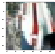

TypeError: Cannot cast ufunc add output from dtype('int16') to dtype('uint8') with casting rule 'same_kind'

In [2]:
from cifar10 import cifar10
import numpy as np
import matplotlib.pyplot as plt

data = cifar10()
batch_size=10
plt.rcParams['figure.dpi'] = 16

for i in range(5):
    x, y,_ = data.get_train_batch(batch_size)
    print ('batch_x shape',np.shape(x))
    for img in x:
        print('image shape',np.shape(img))
        plt.imshow(np.array(img))
        plt.show()
        img = data.random_bright(img)
        plt.imshow(np.array(img))
        plt.show()
        print('-----------------------')